# ML-проект для снижения издержек в металлургии

## Описание проекта

<p>Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали.</p>

<strong>Задача:</strong>
<p>Цель проекта - оптимизация производственных расходов металлургического комбината за счёт снижения потребления электроэнергии в процессе обработки стали. Для достижения этой цели необходимо разработать модель машинного обучения, которая будет предсказывать конечную температуру расплавленной стали.</p>

<h3>Описание этапа обработки</h3>
<ol>
    <li>Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша.</li>
    <li>Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»). </li>
    <li>Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. </li>
    <li>Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки. Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).</li>

</ol>

<h3>Описание данных</h3>
<p>Данные состоят из файлов, полученных из разных источников:</p>
<ul>
    <li>data_arc_new.csv — данные об электродах;</li>
    <li>data_bulk_new.csv: объем подачи сыпучих материалов.</li>
    <li>data_bulk_time_new.csv: время подачи сыпучих материалов.</li>
    <li>data_gas_new.csv: данные о продувке сплава газом.</li>
    <li>data_temp_new.csv: результаты измерения температуры.</li>
    <li>data_wire_new.csv: объем проволочных материалов.</li>
    <li>data_wire_time_new.csv: время подачи проволочных материалов.</li>
</ul>

<h3>Особенности моделирования:</h3>
<p>Моделируется один ковш (партия стали). Уникальность каждого процесса определяется ключом. Целевой переменной является последняя температура партии. Ключевой признак для модели - начальная температура, измеренная до начала процесса. Эффективное прогнозирование температуры позволит компании значительно экономить на электричестве и уменьшить затраты на техническое обслуживание и ремонты оборудования.</p>


## План работ по проекту:




<ol>
    <li>Загрузка данных
        <ul>
            <li>Импорт необходимых библиотек.</li>
            <li>Загрузка данных.</li>
        </ul>
    </li>
    <li>Исследование каждого датафрейма
        <ul>
            <li>Вывод первых строк каждого датафрейма для первичного ознакомления</li>
            <li>Использование методов info и describe для статистического анализа.</li>
            <li>Визуализация распределений признаков с использованием графиков</li>
            <li>Проверка дубликатов и пропусков</li>
            <li>Выводы</li>
        </ul>
    </li>
    <li>Вопросы к бизнесу на основании полученных данных</li>
    <li>Предобработка данных
        <ul>
            <li>Удаление аномалий</li>
            <li>Заполнение пропусков</li>
            <li>Генерация новых признаков</li>
            <li>Агрегирование по ключу</li>
            <li>Выводы</li>
        </ul>
    </li>
    <li>Объединение в один датафрейм</li>
    <li>Исследование объединенного датафрейма и предобработка
        <ul>
            <li>Анализ корреляции между признаками с использованием матрицы корреляции и тепловой карты.</li>
            <li>Отбор признаков для обучения модели на основе анализа корреляции и бизнес-логики.</li>
            <li>Масштабирование данных с использованием StandardScaler (если потребуется)</li>
            <li>Выводы</li>
        </ul>
    </li>
    <li>Разделение на выборки и масштабирование</li>
    <li>Моделирование
        <ul>
            <li>Подбор гиперпараметров с использованием RandomizedSearchCV.</li>
            <li>Выбор лучшей модели на основе результатов кросс-валидации.</li>
        </ul>
    </li>
    <li>Проверка качества модели на тестовой выборке
        <ul>
            <li>Оценка итоговых метрик качества модели.</li>
            <li>Анализ результатов и возможные рекомендации для улучшения модели.</li>
        </ul>
    </li>
    <li>Подведение итогов проекта.</li>
</ol>

</body>

In [2]:
#!pip install catboost seaborn

## Загрузка библиотек и данных

Загрузим библиотеки

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from catboost import CatBoostClassifier

Загрузим и изучим данные

In [4]:
try:
  data_arc_new = pd.read_csv('/datasets/data_arc.csv')
  data_bulk_new = pd.read_csv('/datasets/data_bulk.csv')
  data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time.csv')
  data_gas_new = pd.read_csv('/datasets/data_gas.csv')
  data_temp_new = pd.read_csv('/datasets/data_temp.csv')
  data_wire_new = pd.read_csv('/datasets/data_wire.csv')
  data_wire_time_new = pd.read_csv('/datasets/data_wire_time.csv')
except:
  data_arc_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_arc_new.csv')
  data_bulk_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_new.csv')
  data_bulk_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_bulk_time_new.csv')
  data_gas_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_gas_new.csv')
  data_temp_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_temp_new.csv')
  data_wire_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_new.csv')
  data_wire_time_new = pd.read_csv('https://code.s3.yandex.net/datasets/data_wire_time_new.csv')

## Первичный анализ данных

## Анализ таблицы data_arc_new

In [5]:
data_arc_new.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [6]:
data_arc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [7]:
data_arc_new.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [8]:
print('Количество пропусков в каждом столбце')
print(data_arc_new.isna().sum())
print(50*'=')
print('Количество дублей')
print(data_arc_new.duplicated().sum())

Количество пропусков в каждом столбце
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
Количество дублей
0


Пропусков и дублей нет, в реактивной мощности есть отрицательные значения. В дальнейшем, на этапе предобработки данных мы избавимся от этого выброса, а пока отфильтруем датафрейм для корректного отображения гистограммы и ящика с усами

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14875 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14875 non-null  int64  
 1   Начало нагрева дугой  14875 non-null  object 
 2   Конец нагрева дугой   14875 non-null  object 
 3   Активная мощность     14875 non-null  float64
 4   Реактивная мощность   14875 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 697.3+ KB
None
                key  Активная мощность  Реактивная мощность
count  14875.000000       14875.000000         14875.000000
mean    1615.186756           0.662749             0.487115
std      934.593897           0.258894             0.197612
min        1.000000           0.223120             0.153777
25%      806.000000           0.467115             0.337190
50%     1617.000000           0.599578             0.441665
75%     2429.000000           0.830135        

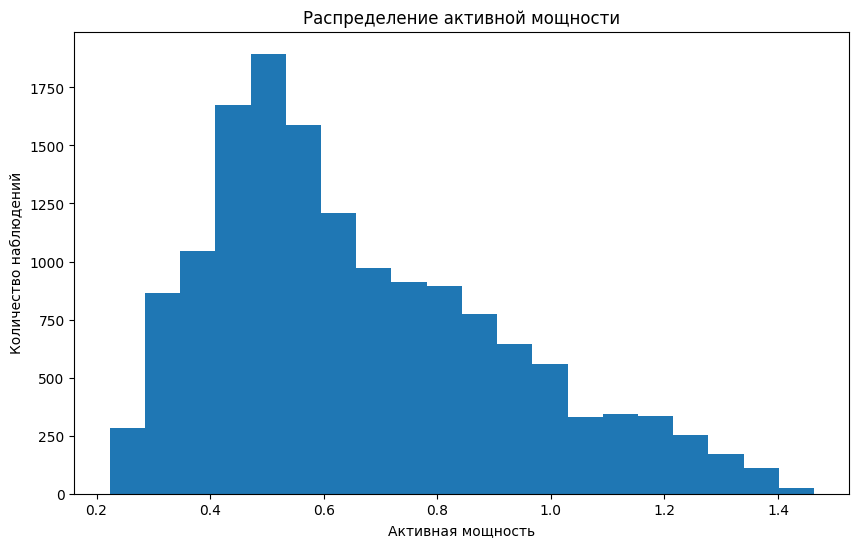

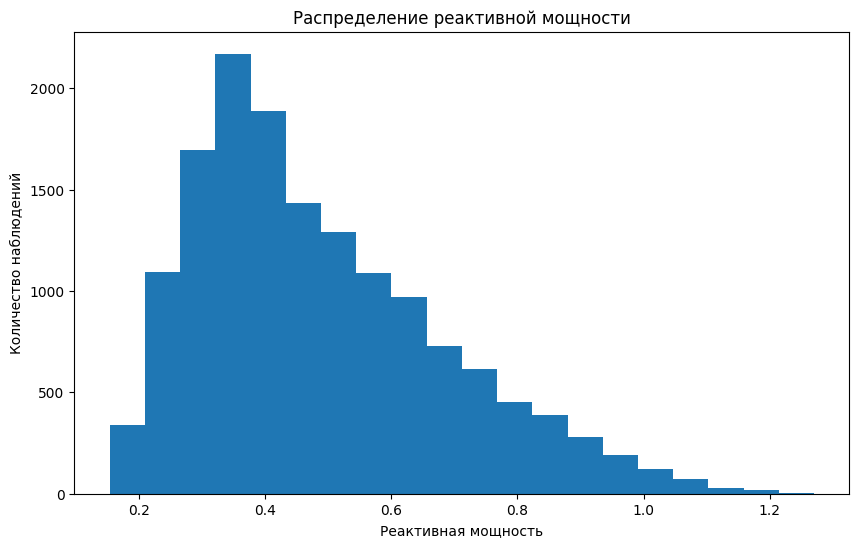

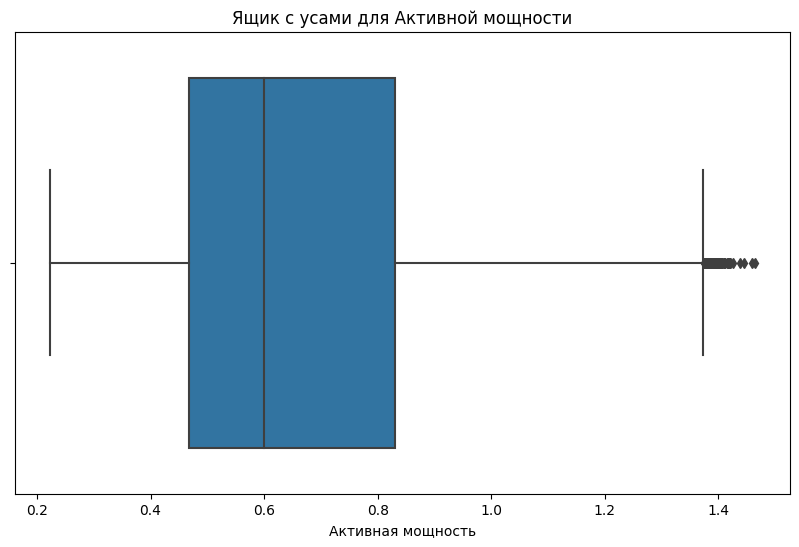

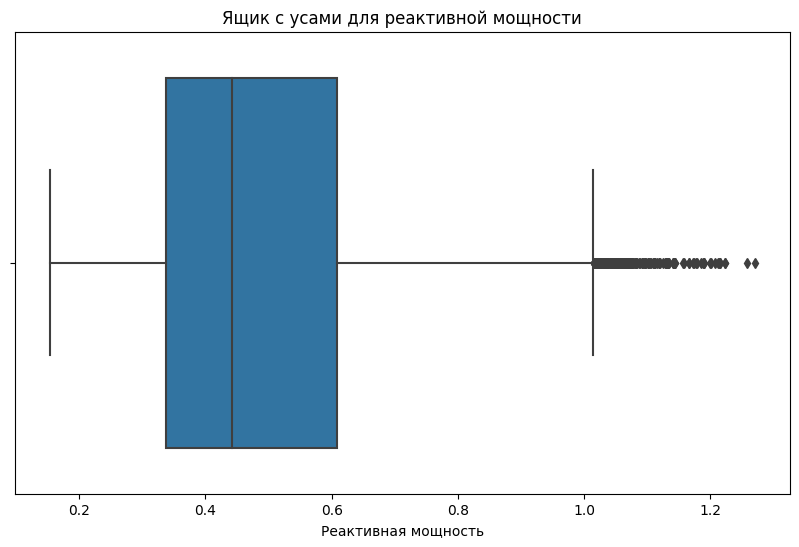

In [9]:
data_arc_new_preclean= data_arc_new[data_arc_new['Реактивная мощность'] > 0]
print(data_arc_new_preclean.info())
print(data_arc_new_preclean.describe())

plt.figure(figsize=(10,6))
plt.hist(data_arc_new_preclean['Активная мощность'], bins=20)
plt.title('Распределение активной мощности')
plt.xlabel('Активная мощность')
plt.ylabel('Количество наблюдений')
plt.show()


plt.figure(figsize=(10,6))
plt.hist(data_arc_new_preclean['Реактивная мощность'], bins=20)
plt.title('Распределение реактивной мощности')
plt.xlabel('Реактивная мощность')
plt.ylabel('Количество наблюдений')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=data_arc_new_preclean['Активная мощность'])
plt.title('Ящик с усами для Активной мощности')
plt.xlabel('Активная мощность')
plt.show()


plt.figure(figsize=(10,6))
sns.boxplot(x=data_arc_new_preclean['Реактивная мощность'])
plt.title('Ящик с усами для реактивной мощности')
plt.xlabel('Реактивная мощность')
plt.show()

### Предварительный вывод по таблице data_arc_new
* Таблица содержит записи с длительностью нагрева, а так же активной и реактивной мощности
* В данных нет дубликатов и пропусков.
* В данных представлены столбцы с датой и временем начала и окончания нагрева, а также значения активной и реактивной мощности.
* Распределение активной мощности приближенно к нормальному
* основное распределение активной мощности между 0.47 и 0.83
* Среднее значение активной мощности составляет около 0.66, медиана — 0.60

* Распределение реактивной мощности также приближенно к нормальному
* основное распределение реактивной мощности между 0.34 и 0.61
* Среднее значение реактивной мощности составляет около 0.49, медиана около 0.45
* В значениях реактивной мощности обнаружен отрицательный выброс. На этапе предобработке данных мы его отфильтруем для всей партии.
* На дальнейших этапах можно создать дополнительные признаки, например получить общую мощность просуммировава активную и реактивную мощности. А также вычислив влияние времени и мощности.

## Анализ таблицы data_bulk_new





In [10]:
print(data_bulk_new.info())
print(50*'=')
print(data_bulk_new.head())
print(50*'=')
print(data_bulk_new.describe())
print(50*'=')
print('Количество пропусков в каждом столбце')
print(data_bulk_new.isna().sum())
print(50*'=')
print('Количество дублей')
print(data_bulk_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB
None
   key  Bulk 1  Bulk 2  Bulk 3  Bulk 4  Bulk 5  Bulk 6  Bulk 7  Bulk 8  \
0    1     NaN     NaN     NaN    43.0     NaN     NaN     NaN     NaN   
1  

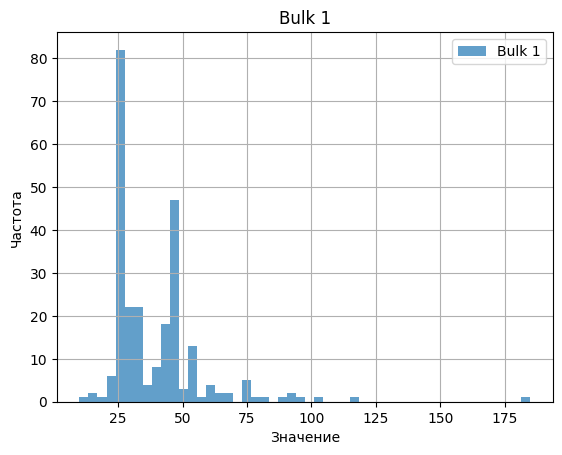

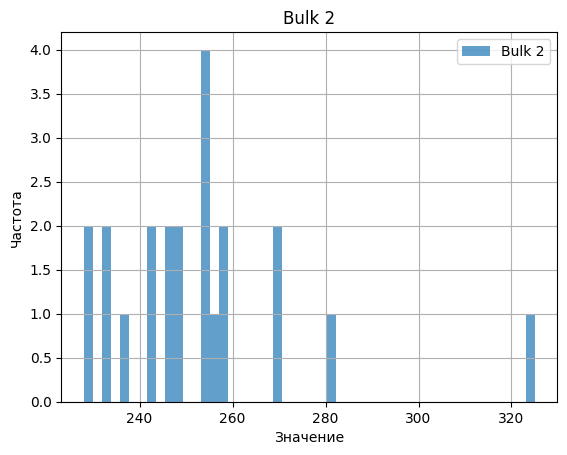

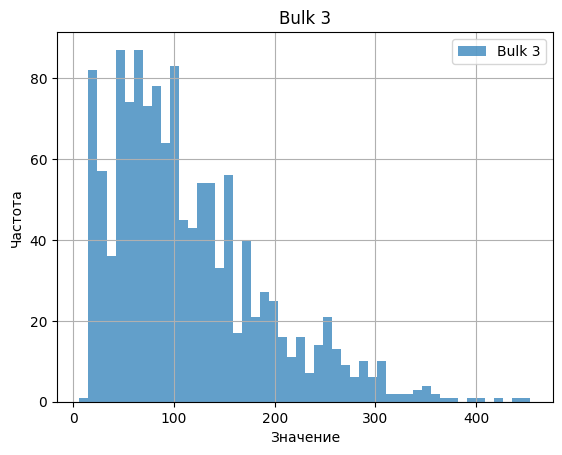

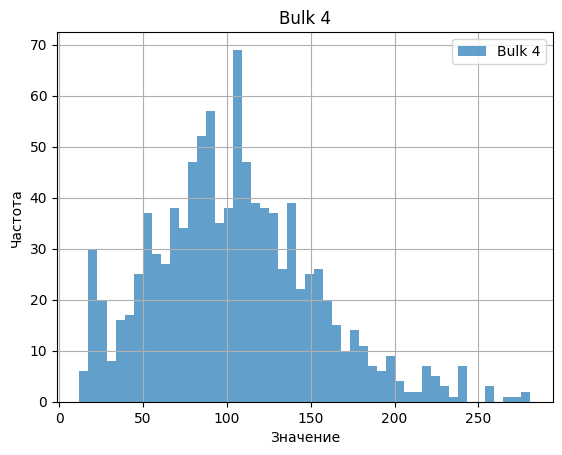

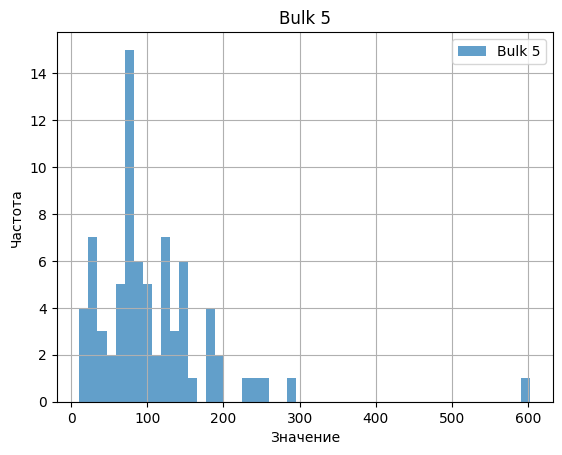

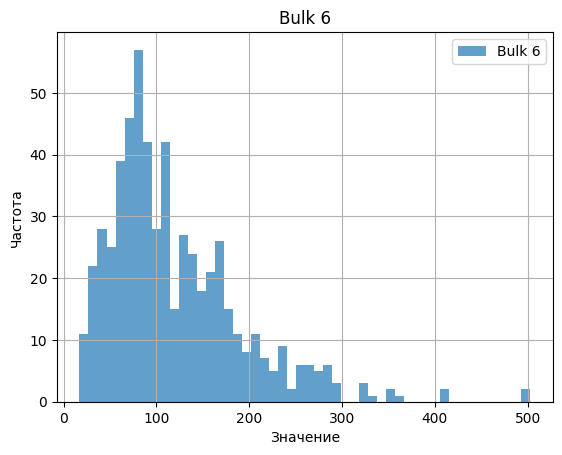

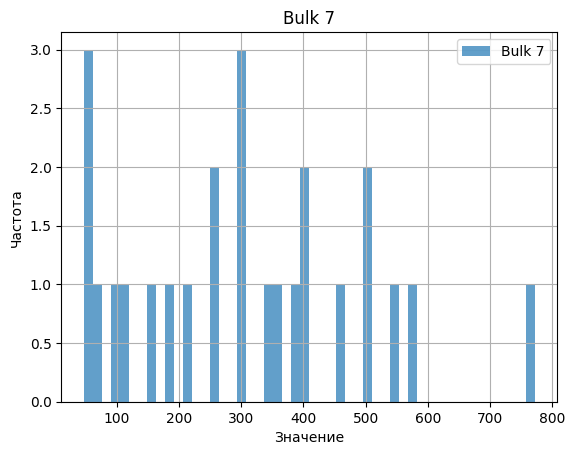

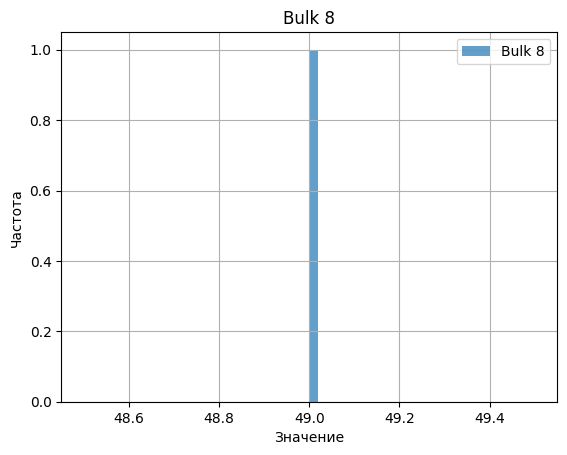

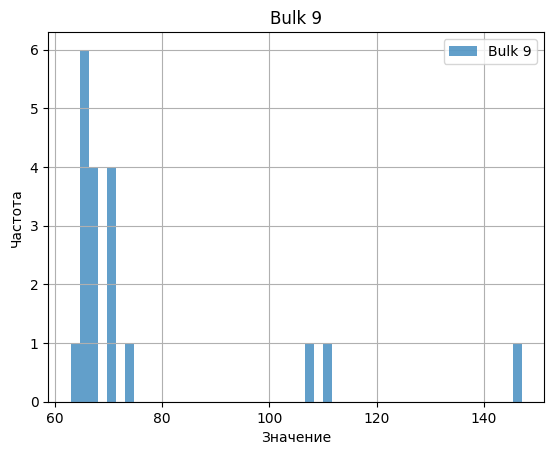

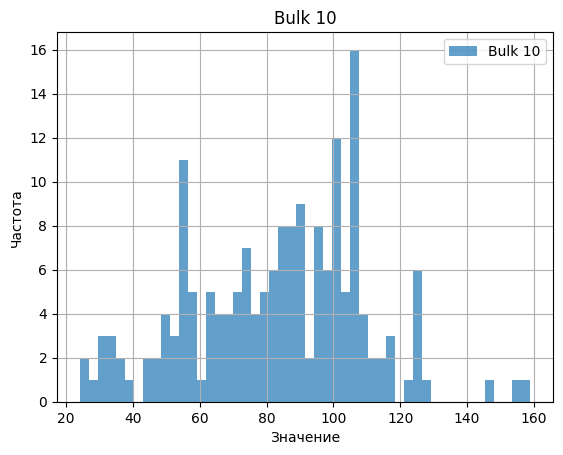

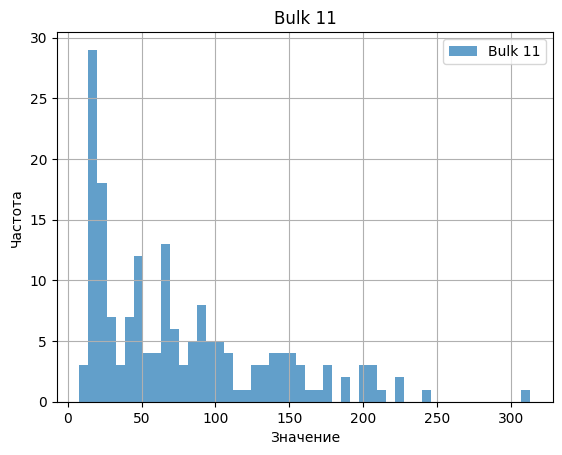

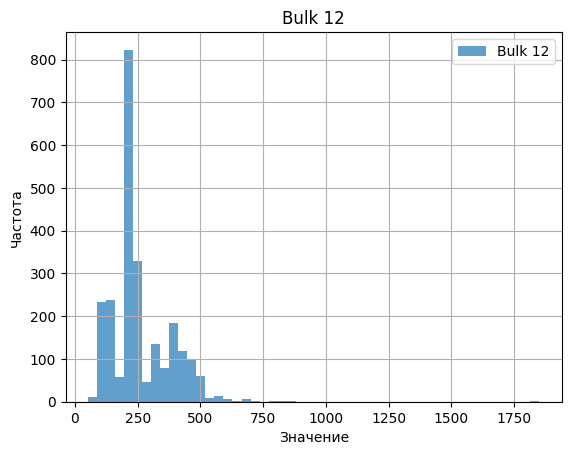

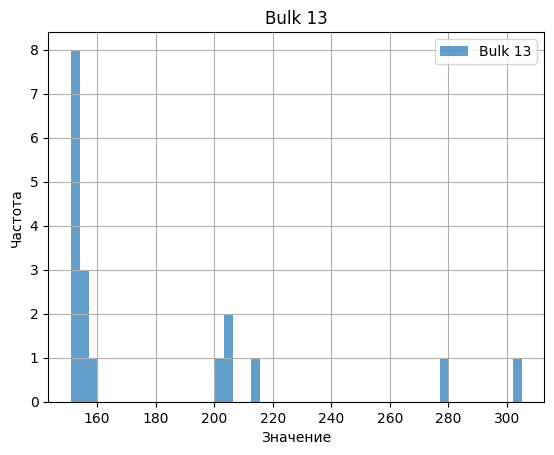

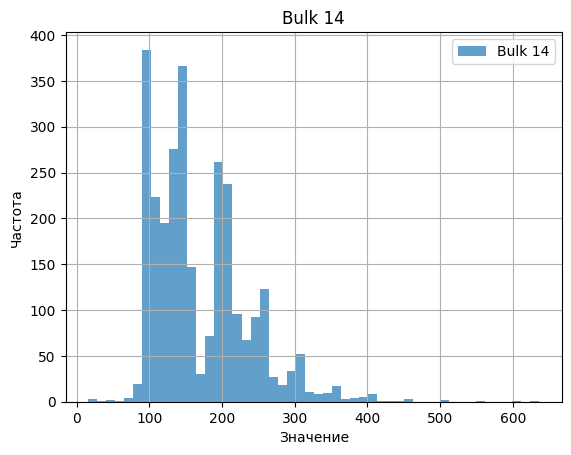

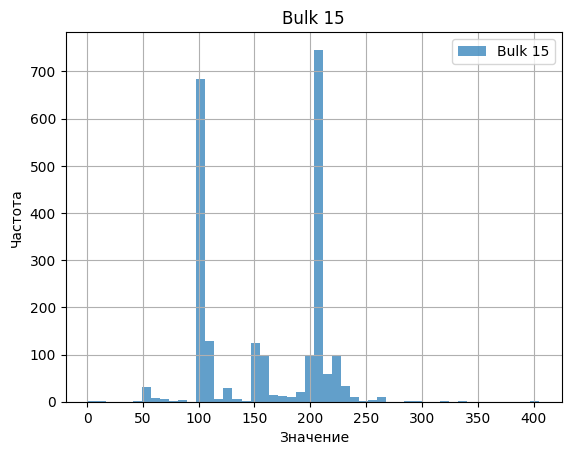

In [11]:
for column in data_bulk_new.columns:
    if column != 'key':
        data_bulk_new[column].hist(bins=50, alpha=0.7, label=column)
        plt.title(column)
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.legend()
        plt.show()

### Предварительный вывод по таблице data_arc_new
* Таблица содержит данные о сыпучих легирующих добавках
* В таблице большое количество пропусков, это обусловлено тем, что если эти добавки не добавлялись. На дальшем этапе мы заполним пропуски нулевыми значениями
* Дубликатов в таблице не обнаружено
* Некотороые добавки применяются относительно редко и в меньших количествах, например добавки Bulk 1,Bulk 5, Bulk 7, Bulk 9, Bulk 10, Bulk 11. Добавка Bulk 8 была использована только в одной партии. На следующем этапе мы её удалим
* Наибольшее среднее значение имеют добавки Bulk 2, Bulk 7, Bulk 12

## Анализ таблицы data_bulk_time_new

In [12]:
print(data_bulk_time_new.info())
print(50*'=')
print(data_bulk_time_new.head())
print(50*'=')
print(data_bulk_time_new.describe())
print(50*'=')
print('Количество пропусков в каждом столбце')
print(data_bulk_time_new.isna().sum())
print(50*'=')
print('Количество дублей')
print(data_bulk_time_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None
   key Bulk 1 Bulk 2 Bulk 3               Bulk 4 Bulk 5 Bulk 6 Bulk 7 Bulk 8  \
0    1    NaN    NaN    NaN  2019-05-03 11:28:48    NaN    NaN    NaN    NaN   
1    2   

### Предварительный вывод по таблице data_bulk_time_new
* Таблица содержит информацию о времени добавления сыпучих материалов
* Заметное количество пропусков в данных. Пропуск в столбце означает, что соответствующий сыпучий материал не добавлялся.
* Дубликатов в таблице не обнаружено

т.к. время добавления сыпучих материалов не влияет на изменение температуры, и  нам известно что временные данные не синхронизированы, в дальнейшем мы не будем использовать эту таблицу.

## Анализ таблицы data_gas_new

In [13]:
print(data_gas_new.info())
print(50*'=')
print(data_gas_new.head())
print(50*'=')
print(data_gas_new.describe())
print(50*'=')
print('Количество пропусков в каждом столбце')
print(data_gas_new.isna().sum())
print(50*'=')
print('Количество дублей')
print(data_gas_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB
None
   key      Газ 1
0    1  29.749986
1    2  12.555561
2    3  28.554793
3    4  18.841219
4    5   5.413692
               key        Газ 1
count  3239.000000  3239.000000
mean   1621.861377    11.002062
std     935.386334     6.220327
min       1.000000     0.008399
25%     812.500000     7.043089
50%    1622.000000     9.836267
75%    2431.500000    13.769915
max    3241.000000    77.995040
Количество пропусков в каждом столбце
key      0
Газ 1    0
dtype: int64
Количество дублей
0


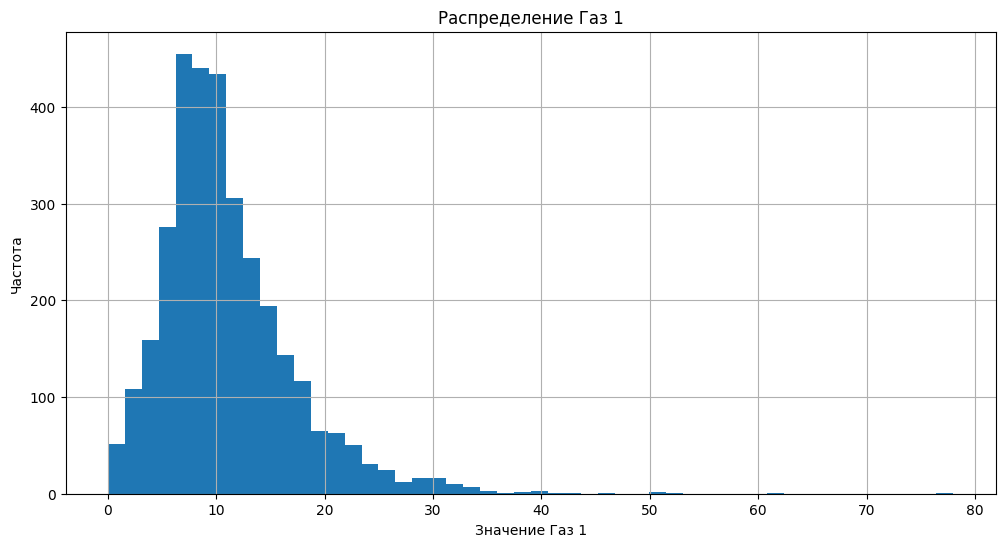

In [14]:
plt.figure(figsize=(12, 6))
data_gas_new['Газ 1'].hist(bins=50)
plt.title('Распределение Газ 1')
plt.xlabel('Значение Газ 1')
plt.ylabel('Частота')
plt.show()



### Предварительный вывод по таблице data_gas_new
* Таблица содержит данные об инертном газе, которые используется для перемешивания расплава в ковше. Можно предположить что при этом процессе температура может изменяться, поэтому эту таблицу мы будем использовать в дальнейшем .Данные предоставлены в относительных значениях что не повлияет на дальнейшее обучение модели.
* Пропусков и дубликатов в данных нет.
* Минимальное значение 0.008, максимальное 0.77. На гистограмме и в describe видно что большее количество данных находится в диапазоне от 7 до 13.7. Это выбросы на этапе обработки мы их отбросим.


## Анализ таблицы data_temp_new

In [15]:
print(data_temp_new.info())
print(50*'=')
print(data_temp_new.head())
print(50*'=')
print(data_temp_new.describe())
print(50*'=')
print('Количество пропусков в каждом столбце')
print(data_temp_new.isna().sum())
print(50*'=')
print('Количество дублей')
print(data_temp_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB
None
   key         Время замера  Температура
0    1  2019-05-03 11:02:04       1571.0
1    1  2019-05-03 11:07:18       1604.0
2    1  2019-05-03 11:11:34       1618.0
3    1  2019-05-03 11:18:04       1601.0
4    1  2019-05-03 11:25:59       1606.0
                key   Температура
count  18092.000000  14665.000000
mean    1616.460977   1590.722741
std      934.641385     20.394381
min        1.000000   1191.000000
25%      807.750000   1580.000000
50%     1618.000000   1590.000000
75%     2429.000000   1599.000000
max     3241.000000   1705.000000
Количество пропусков в каждом столбце
key               

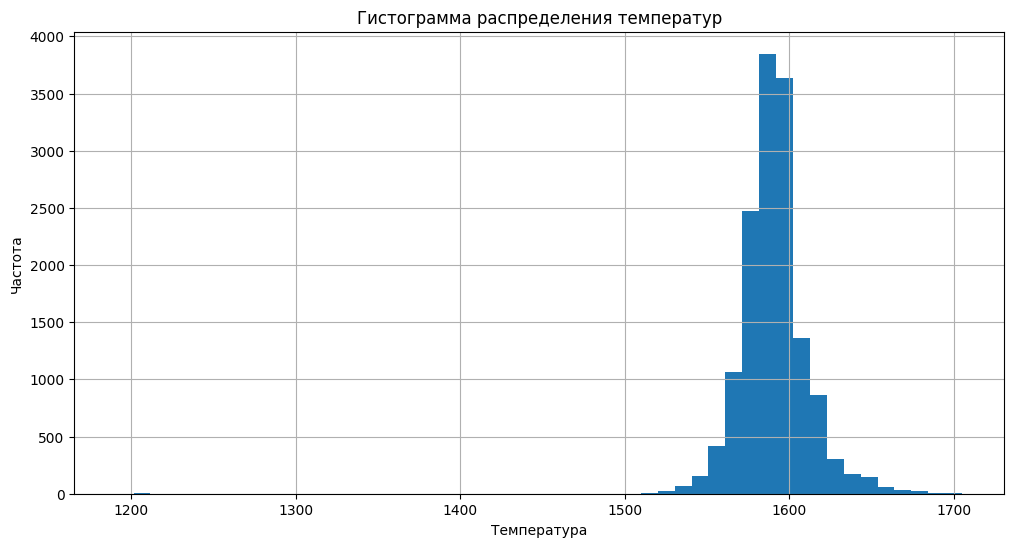

In [16]:
plt.figure(figsize=(12, 6))
data_temp_new['Температура'].hist(bins=50)
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.title('Гистограмма распределения температур')
plt.show()

### Предварительный вывод по таблице data_temp_new
* Таблица содержит данные о температуре расплава.
* Есть пропуски в столбце температура, на этапе обработки данных мы их отбросим для всей партии.
* В данных есть очевидные ошибки, такие как температура 1200 градусов. На этапе обработки мы отбросим значения ниже 1450 градусов.
* Средняя температура 1590 градусов с отклонением в 20 градусов, что говорит нам о том что большинство записей находятся в этом значении.


## Анализ таблицы data_wire_new

In [17]:
print(data_wire_new.info())
print(50*'=')
print(data_wire_new.head())
print(50*'=')
print(data_wire_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_wire_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_wire_new.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB
None
   key     Wire 1   Wire 2  Wire 3  Wire 4  Wire 5  Wire 6  Wire 7  Wire 8  \
0    1  60.059998      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1    2  96.052315      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2    3  91.160157      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3    4  89.063515      NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4 

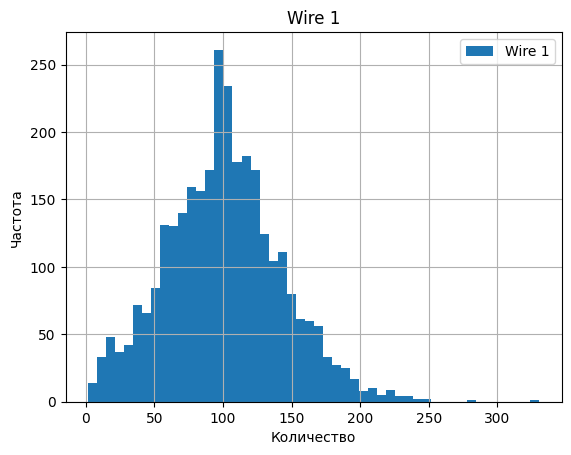

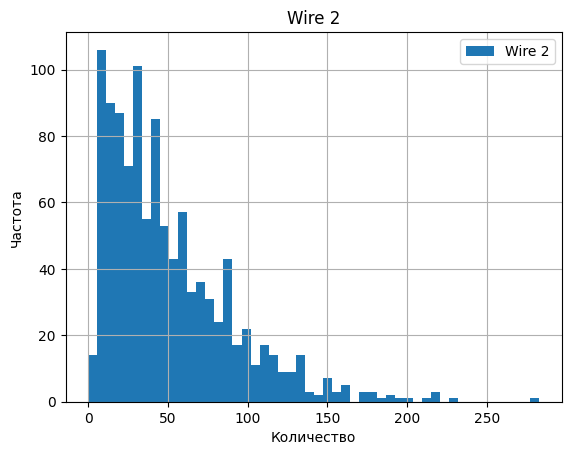

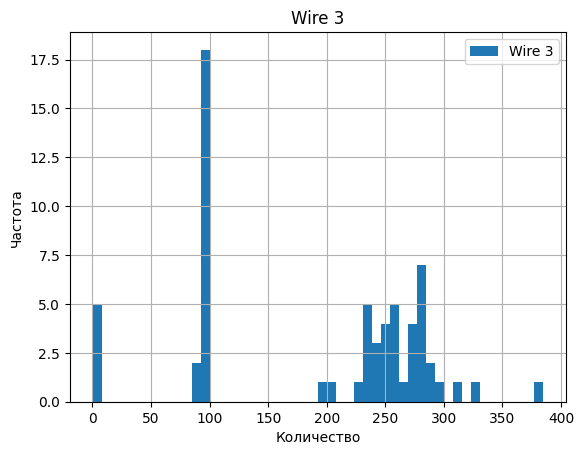

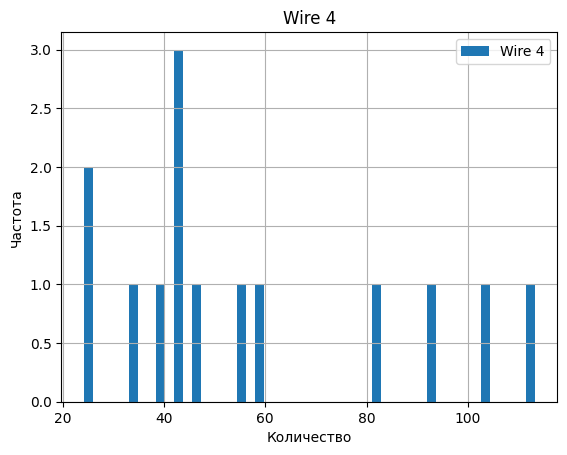

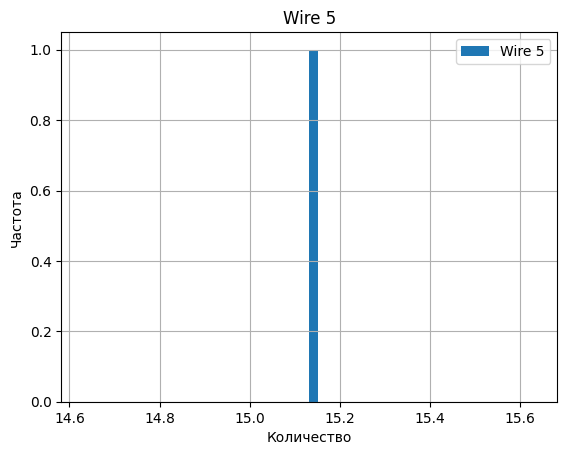

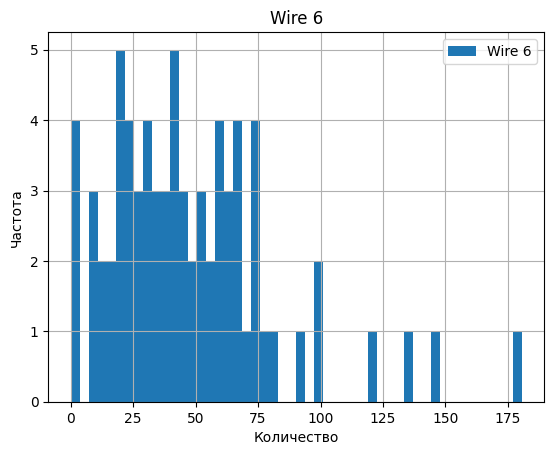

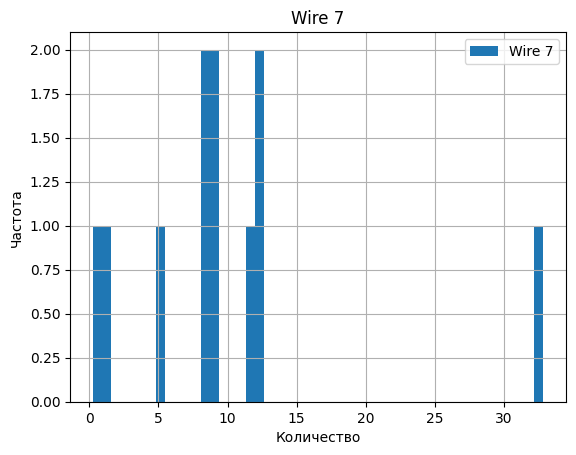

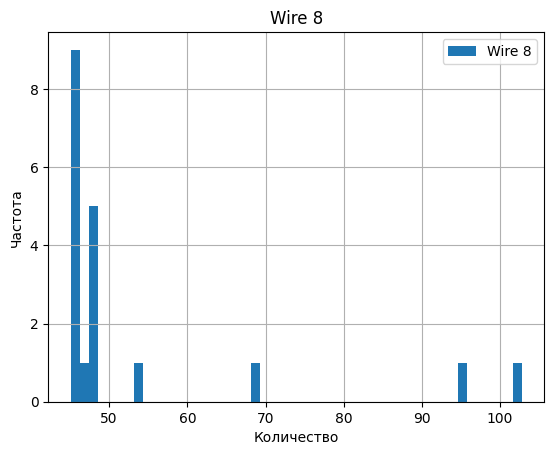

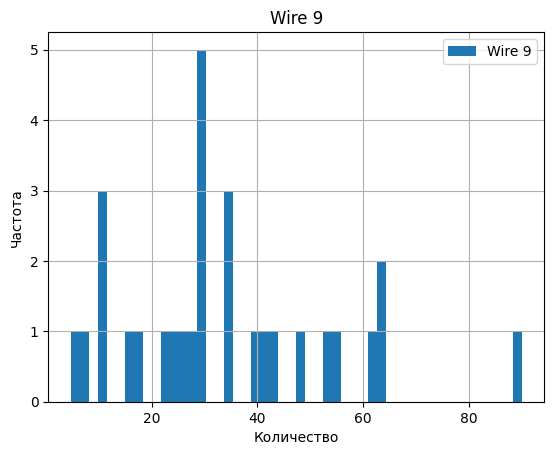

In [18]:
for column in data_wire_new.columns:
    if column != 'key':
        # Построение гистограммы
        data_wire_new[column].hist(bins=50, label=column)
        plt.title(column)
        plt.xlabel('Количество')
        plt.ylabel('Частота')
        plt.legend()
        plt.show()

### Предварительный вывод по таблице data_wire_new
* Таблица содержит информацию о добавлении проволоки в партии металла.
* По аналогии с сыпучими материалами, пропуски в столбце означают, что соответствующий проволоки не добавлялись. В дальнейшем будут заполненны нулями.
* Дубликатов в таблице не обнаружено
* Наибольшее количество пропусков у проволоки wire 3 - wire 9
* Самый распространенный тип проволоки wire 1, у которого всего 23 пропуска, wire 2 содержит 2002 пропуска.
* Проволока Wire 5 используется всего один раз, поэтому будет удалена в дальнейшем.

## Анализ таблицы data_wire_time_new

In [19]:
print(data_wire_time_new.info())
print(50*'=')
print(data_wire_time_new.head())
print(50*'=')
print(data_wire_time_new.describe())
print(50*'=')
print('Колличество пропусков в каждом столбце')
print(data_wire_time_new.isna().sum())
print(50*'=')
print('Колличество дублей')
print(data_wire_time_new.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
   key               Wire 1               Wire 2 Wire 3 Wire 4 Wire 5 Wire 6  \
0    1  2019-05-03 11:06:19                  NaN    NaN    NaN    NaN    NaN   
1    2  2019-05-03 11:36:50                  NaN    NaN    NaN    NaN    NaN   
2    3  2019-05-03 12:11:46                  NaN    NaN    NaN    NaN    NaN   
3    4  2019-05-03 12:43:22                  NaN    NaN    NaN    NaN    NaN   
4   

### Предварительный вывод по таблице data_temp_new

* Таблица содержит информацию о времени добавления проволоки в расплав.
* Большое количество пропусков в данных. Пропуск в столбце означает, что соответствующая проволока не добавлялась.
* Дубликатов в таблице не обнаружено.
* Так как время добавления проволоки не влияет на изменение температуры, и нам известно, что временные данные не синхронизированы, в дальнейшем мы не будем использовать эту таблицу.

# Вывод:


<strong>Таблицы:</strong>

 Данные касаются процесса производства стали: детали добавления материалов, нагрев, температура, и использование газа.

<strong>Аномалии и проблемы:</strong>

* Пропуски в столбцах про добавление материалов.
* Аномальные температурные показатели.
* Отрицательный выброс в данных о мощности.
* Потенциальные выбросы в данных о газе.

<strong>Действия:</strong>

<strong>1 Пропуски: </strong>Заполняем нулями, где материал не добавлялся.

<strong>2 Аномалии:</strong> Удаляем или корректируем некорректные значения.

<strong>3 Дубликаты:</strong> Не обнаружены.

<strong>4 Лишние данные: </strong>Таблицы с несинхронизированными временными
данными игнорируем или удаляем.

<strong>Заключение: </strong>

Данные требуют коррекции пропусков и аномалий перед дальнейшим анализом.

## Вопросы к бизнесу на основании полученных данных

1. Выбросы в данных о газе: Можно ли уточнить, почему иногда значения газа сильно выделяются из общего распределения? Может ли это свидетельствовать о каких-то особых условиях процесса?

2. Сыпучие добавки и проволока: Почему некоторые добавки и проволоки используются гораздо реже других? Можно ли получить дополнительную информацию о назначении этих материалов?

## Дополнительный вопрос
Ты на стриме говорил что можешь дать ссылки на инфу про кросс валидацию и RandomizedSearchCV. Можешь отправить плиз?

## Предобработка данных


## Удаление аномалий


### data_arc_new


In [28]:
negative_reactive_power_keys = data_arc_new[data_arc_new['Реактивная мощность'] < 0]['key']
print(negative_reactive_power_keys.describe())

data_arc_new = data_arc_new[~data_arc_new['key'].isin(negative_reactive_power_keys)]
data_arc_new.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: key, dtype: float64


,key,Активная мощность,Реактивная мощность
count,14872.000000,14872.000000,14872.000000
mean,1615.085732,0.662753,0.487112
std,934.661090,0.258916,0.197623
min,1.000000,0.223120,0.153777
25%,806.000000,0.467114,0.337175
50%,1616.000000,0.599587,0.441667
75%,2429.000000,0.830314,0.608201
max,3241.000000,1.463773,1.270284


## Заполнение пропусков


##Генерация новых признаков